In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [52]:
#Loading the necessary libraries-----------------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import mannwhitneyu
import os
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import precision_score, recall_score, make_scorer, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
### loading the Data
TrainBenign_df = pd.read_csv("../TrainBenign.csv")
TrainPathogenic_df = pd.read_csv("../TrainPathogenic.csv")
TestBenign_df = pd.read_csv("../TestBenign.csv")
TestPathogenic_df = pd.read_csv("../TestPathogenic.csv")

In [3]:
#Printing the number of rows and columns in train benign dataframe
n_rows, n_col = TrainBenign_df.shape
print("The number of rows in TrainBenign dataset is", n_rows)
print("The number of columns in TrainBenign dataset is", n_col)

The number of rows in TrainBenign dataset is 10158
The number of columns in TrainBenign dataset is 48


In [4]:
#Printing the number of rows and columns in train pathogenic dataframe
n_rows, n_col = TrainPathogenic_df.shape
print("The number of rows in TrainPathogenic dataset is", n_rows)
print("The number of columns in TrainPathogenic dataset is", n_col)

The number of rows in TrainPathogenic dataset is 6547
The number of columns in TrainPathogenic dataset is 48


In [5]:
#Printing the number of rows and columns in test benign dataframe
n_rows, n_col = TestBenign_df.shape
print("The number of rows in TestBenign dataset is", n_rows)
print("The number of columns in TestBenign dataset is", n_col)

The number of rows in TestBenign dataset is 3010
The number of columns in TestBenign dataset is 48


In [6]:
#Printing the number of rows and columns in test pathogenic dataframe
n_rows, n_col = TestPathogenic_df.shape
print("The number of rows in TestPathogenic dataset is", n_rows)
print("The number of columns in TestPathogenic dataset is", n_col)

The number of rows in TestPathogenic dataset is 1335
The number of columns in TestPathogenic dataset is 48


In [7]:
#A function to Compute the total number of empty rows in individual columns
def detect_missn_vals_and_counts(df, missn_vals=["?", ",", "N/A", "nan", "NaN", "null"]):
    missn_info = {}
    for col in df.columns:
        col_missn_counts = {}

        temp_col = df[col].astype(str)
        for val in missn_vals:
            count = temp_col.apply(lambda x: x.strip() == val).sum()
            if count > 0:
                col_missn_counts[val] = count
        if col_missn_counts:
            missn_info[col] = col_missn_counts
    return missn_info

In [8]:
#Printing the total number of empty rows in each column in the train benign dataframe
print(detect_missn_vals_and_counts(TrainBenign_df))

{'Mutation': {'nan': 1661}, 'dTotal_Energy': {'nan': 1661}, 'dBackbone_Hbond': {'nan': 1661}, 'dSidechain_Hbond': {'nan': 1661}, 'dVan_der_Waals': {'nan': 1661}, 'dElectrostatics': {'nan': 1661}, 'dSolvation_Polar': {'nan': 1661}, 'dSolvation_Hydrophobic': {'nan': 1661}, 'dVan_der_Waals_Clashes': {'nan': 1661}, 'dEntropy_Sidechain': {'nan': 1661}, 'dEntropy_Mainchain': {'nan': 1661}, 'dShort_Loop_Entropy': {'nan': 1661}, 'dMedium_Loop_Entropy': {'nan': 1661}, 'dCis_Bond': {'nan': 1661}, 'dTorsional_Clash': {'nan': 1661}, 'dBackbone_Clash': {'nan': 1661}, 'dHelix_Dipole': {'nan': 1661}, 'dWater_Bridge': {'nan': 1661}, 'dDisulfide': {'nan': 1661}, 'dElectrostatic_kon': {'nan': 1661}, 'dPartial_Covalent_Bonds': {'nan': 1661}, 'dIonization_Energy': {'nan': 1661}, 'dEntropy_Complex': {'nan': 1661}}


In [9]:
#Printing the total number of empty rows in each column in the train pathogenic dataframe
print(detect_missn_vals_and_counts(TrainPathogenic_df))

{'Mutation': {'nan': 1583}, 'dTotal_Energy': {'nan': 1583}, 'dBackbone_Hbond': {'nan': 1583}, 'dSidechain_Hbond': {'nan': 1583}, 'dVan_der_Waals': {'nan': 1583}, 'dElectrostatics': {'nan': 1583}, 'dSolvation_Polar': {'nan': 1583}, 'dSolvation_Hydrophobic': {'nan': 1583}, 'dVan_der_Waals_Clashes': {'nan': 1583}, 'dEntropy_Sidechain': {'nan': 1583}, 'dEntropy_Mainchain': {'nan': 1583}, 'dShort_Loop_Entropy': {'nan': 1583}, 'dMedium_Loop_Entropy': {'nan': 1583}, 'dCis_Bond': {'nan': 1583}, 'dTorsional_Clash': {'nan': 1583}, 'dBackbone_Clash': {'nan': 1583}, 'dHelix_Dipole': {'nan': 1583}, 'dWater_Bridge': {'nan': 1583}, 'dDisulfide': {'nan': 1583}, 'dElectrostatic_kon': {'nan': 1583}, 'dPartial_Covalent_Bonds': {'nan': 1583}, 'dIonization_Energy': {'nan': 1583}, 'dEntropy_Complex': {'nan': 1583}}


In [10]:
#Printing the total number of empty rows in each column in the test benign dataframe
print(detect_missn_vals_and_counts(TestBenign_df))

{'Mutation': {'nan': 785}, 'dTotal_Energy': {'nan': 785}, 'dBackbone_Hbond': {'nan': 785}, 'dSidechain_Hbond': {'nan': 785}, 'dVan_der_Waals': {'nan': 785}, 'dElectrostatics': {'nan': 785}, 'dSolvation_Polar': {'nan': 785}, 'dSolvation_Hydrophobic': {'nan': 785}, 'dVan_der_Waals_Clashes': {'nan': 785}, 'dEntropy_Sidechain': {'nan': 785}, 'dEntropy_Mainchain': {'nan': 785}, 'dShort_Loop_Entropy': {'nan': 785}, 'dMedium_Loop_Entropy': {'nan': 785}, 'dCis_Bond': {'nan': 785}, 'dTorsional_Clash': {'nan': 785}, 'dBackbone_Clash': {'nan': 785}, 'dHelix_Dipole': {'nan': 785}, 'dWater_Bridge': {'nan': 785}, 'dDisulfide': {'nan': 785}, 'dElectrostatic_kon': {'nan': 785}, 'dPartial_Covalent_Bonds': {'nan': 785}, 'dIonization_Energy': {'nan': 785}, 'dEntropy_Complex': {'nan': 785}}


In [11]:
#Printing the total number of empty rows in each column in the test pathogenic dataframe
print(detect_missn_vals_and_counts(TestPathogenic_df))

{'Mutation': {'nan': 512}, 'dTotal_Energy': {'nan': 512}, 'dBackbone_Hbond': {'nan': 512}, 'dSidechain_Hbond': {'nan': 512}, 'dVan_der_Waals': {'nan': 512}, 'dElectrostatics': {'nan': 512}, 'dSolvation_Polar': {'nan': 512}, 'dSolvation_Hydrophobic': {'nan': 512}, 'dVan_der_Waals_Clashes': {'nan': 512}, 'dEntropy_Sidechain': {'nan': 512}, 'dEntropy_Mainchain': {'nan': 512}, 'dShort_Loop_Entropy': {'nan': 512}, 'dMedium_Loop_Entropy': {'nan': 512}, 'dCis_Bond': {'nan': 512}, 'dTorsional_Clash': {'nan': 512}, 'dBackbone_Clash': {'nan': 512}, 'dHelix_Dipole': {'nan': 512}, 'dWater_Bridge': {'nan': 512}, 'dDisulfide': {'nan': 512}, 'dElectrostatic_kon': {'nan': 512}, 'dPartial_Covalent_Bonds': {'nan': 512}, 'dIonization_Energy': {'nan': 512}, 'dEntropy_Complex': {'nan': 512}}


In [12]:
mTrainBenign_df = TrainBenign_df.dropna(how="any")
mTrainPathogenic_df = TrainPathogenic_df.dropna(how="any")
mTestBenign_df = TestBenign_df.dropna(how="any")
mTestPathogenic_df = TestPathogenic_df.dropna(how="any")

In [13]:
#Defining a function to compute the count of unique values in each feature in the dataset
def unique_col_vals(df):
    total = df.count()
    temp = pd.DataFrame(total)
    temp.columns = ["Total"]

    uniq = []
    for col in df.columns:
        uniq_val = df[col].nunique()
        uniq.append(uniq_val)

    temp["Unique"] = uniq
    return(np.transpose(temp))

In [14]:
#Printing count of unique values in each column in the train pathogenic dataframe
unique_col_vals(mTrainPathogenic_df)

,Pdb,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,...,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dWater_Bridge,dDisulfide,dElectrostatic_kon,dPartial_Covalent_Bonds,dIonization_Energy,dEntropy_Complex
Total,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964,...,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964
Unique,4964,4862,4592,4488,4792,4441,4779,4833,4777,4870,...,102,3486,2131,2391,1,123,1,1,1009,1


In [15]:
#Printing count of unique values in each column in the train benign dataframe
unique_col_vals(mTrainBenign_df)

,Pdb,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,...,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dWater_Bridge,dDisulfide,dElectrostatic_kon,dPartial_Covalent_Bonds,dIonization_Energy,dEntropy_Complex
Total,8497,8497,8497,8497,8497,8497,8497,8497,8497,8497,...,8497,8497,8497,8497,8497,8497,8497,8497,8497,8497
Unique,8497,8312,6581,6414,8087,6383,8097,8155,7283,8336,...,960,3639,1494,2033,1,27,1,1,753,1


In [16]:
#Printing count of unique values in each column in the test pathogenic dataframe
unique_col_vals(mTestPathogenic_df)

,Pdb,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,...,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dWater_Bridge,dDisulfide,dElectrostatic_kon,dPartial_Covalent_Bonds,dIonization_Energy,dEntropy_Complex
Total,823,823,823,823,823,823,823,823,823,823,...,823,823,823,823,823,823,823,823,823,823
Unique,823,821,802,781,814,779,817,815,810,821,...,6,704,583,478,1,13,1,1,194,1


In [17]:
#Printing count of unique values in each column in the test benign dataframe
unique_col_vals(mTestBenign_df)

,Pdb,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,...,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dWater_Bridge,dDisulfide,dElectrostatic_kon,dPartial_Covalent_Bonds,dIonization_Energy,dEntropy_Complex
Total,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225,...,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225
Unique,2225,2210,1874,1809,2163,1797,2159,2176,2024,2206,...,279,1309,687,631,1,8,1,1,220,1


In [18]:
#Defining a function to identify columns with a single unique count
def show_single_uniq_col(df):
    single_uniq_col = [col for col in df.columns if df[col].nunique() in (1,2,3,4)]
    return single_uniq_col

In [19]:
#Printing columns with single unique count in train benign dataframe
show_single_uniq_col(mTrainBenign_df)

['sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'Class',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex']

In [20]:
#Printing columns with single unique count in train pathogenic dataframe
show_single_uniq_col(mTrainPathogenic_df)

['sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'Class',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex']

In [21]:
#Printing columns with single unique count in test pathogenic dataframe
show_single_uniq_col(mTestPathogenic_df)

['sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'Class',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex']

In [22]:
#Printing columns with single unique count in test benign dataframe
show_single_uniq_col(mTestBenign_df)

['sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'Class',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex']

In [23]:
#Defining a list of all columns with a single unique value. Add Pdb, Mutation and Variant columns since they have no relevance in downstream analysis
col_to_drop = [
 'Pdb', 
 'Mutation', 
 'Variant',
 'sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex'
]

In [24]:
#Dropping the defined columns 
mTrainBenign_df = mTrainBenign_df.drop(columns=col_to_drop)
mTrainPathogenic_df = mTrainPathogenic_df.drop(columns=col_to_drop)
mTestBenign_df = mTestBenign_df.drop(columns=col_to_drop)
mTestPathogenic_df = mTestPathogenic_df.drop(columns=col_to_drop)

In [25]:
train_dtframes = [mTrainBenign_df, mTrainPathogenic_df] #Two categories of train dataframe
test_dtframes = [mTestBenign_df, mTestPathogenic_df] #Two categories of test dataframe

#Merge and shuffle the data. Reset index after shuffling to ensure clean indices 
train_df = pd.concat(train_dtframes).sample(frac=1).reset_index(drop=True)
test_df = pd.concat(test_dtframes).sample(frac=1).reset_index(drop=True)

In [26]:
#There are two classes in the target variable. Let's check if the class is imbalanced in the train dataset. 
#Let's do this with Random Under-Sampling technique. We want a 50/50 ratio between the two classes
#First, let's determine the total count of the two classes and bring them to the same count
train_df["Class"].value_counts()

Benign        8497
Pathogenic    4964
Name: Class, dtype: int64

In [27]:
#The Class Payhogenic has 4964 counts. We have to get the same representation for the Benign Class
class_pathogenic = train_df[train_df["Class"] == "Pathogenic"]
class_benign = train_df[train_df["Class"] == "Benign"][:4964]

#Combine the two classes and shuffle the final rows in the dataset.
class_merge = pd.concat([class_pathogenic, class_benign])
final_train_df = class_merge.sample(frac=1, random_state=42).reset_index(drop=True)

2025-02-05 18:22:31,590 [28536] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-28-fa906b130179>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=train_df, ax=axs[0], palette="Set2")

2025-02-05 18:22:31,658 [28536] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-28-fa906b130179>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=final_train_df, ax=axs[1], palette="Set2")



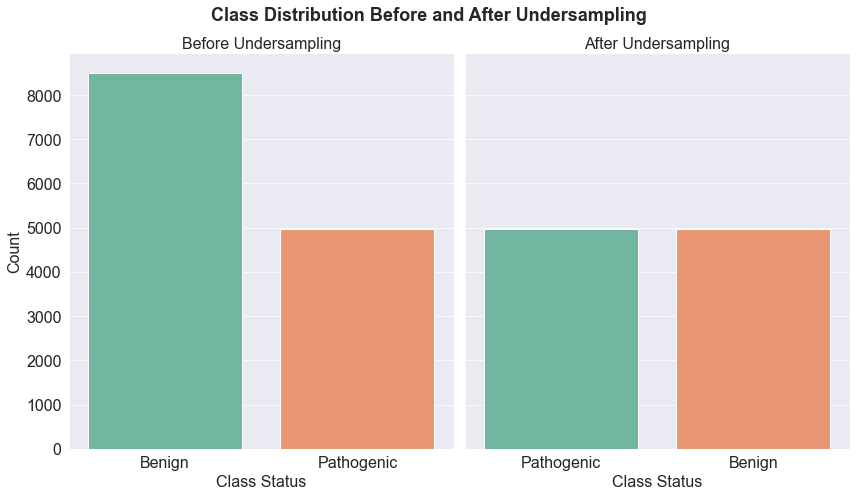

In [28]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols=2, figsize=(12, 7), sharey=True)
fig.suptitle("Class Distribution Before and After Undersampling", fontsize=18, fontweight='bold')

sns.countplot(x="Class", data=train_df, ax=axs[0], palette="Set2")
sns.countplot(x="Class", data=final_train_df, ax=axs[1], palette="Set2")

axs[0].set_title("Before Undersampling", fontsize=16)
axs[0].set_xlabel("Class Status", fontsize=16)
axs[0].set_ylabel("Count", fontsize=16)
axs[0].tick_params(axis='both', labelsize=16)

axs[1].set_title("After Undersampling", fontsize=16)
axs[1].set_xlabel("Class Status", fontsize=16)
axs[1].set_ylabel("Count", fontsize=16)
axs[1].tick_params(axis='both', labelsize=16)

sns.despine()
plt.tight_layout()
plt.show();

In [29]:
#List columns with negative values. 
col = [
    'Class',
    'Total_energy',
    'Solvation_Polar', 
    'Van_der_Waals_clashes', 
    'Entropy_sidechain', 
    'Entropy_mainchain',
    'cis_bond', 
    'Torsional_clash', 
    'Backbone_clash', 
    'Energy_Ionisation'
]

#Call the abs() function on all columns with negative values
#train_dt = final_train_df.copy()
#test_dt = test_df.copy()

#train_dt.loc[:, ~train_dt.columns.isin(col)] = train_dt.loc[:, ~train_dt.columns.isin(col)].abs()
#test_dt.loc[:, ~test_dt.columns.isin(col)] = test_dt.loc[:, ~test_dt.columns.isin(col)].abs()

In [29]:
train_dt = final_train_df.copy()
test_dt = test_df.copy()

### Let's plot the association of some of the features with the variant pathogenicity

2025-02-05 18:22:46,821 [28536] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-30-6d0d30470f4f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(



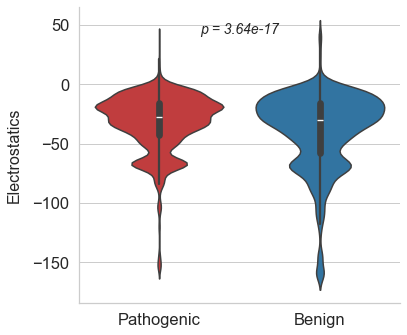

In [30]:
#The distribution of Electrostatics between the benign and pathogenic variants (Mann-Whitney U test). 
#The violin plot depicts the distribution of the electrostatics values using density curves. 
#The boxes show the median +/- one quatile. Whiskers extend 1.5 times the inter-quartile range.

# Plotting the violin plot
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(6, 5))

# Create the violin plot
sns.violinplot(
    x="Class", 
    y="Electrostatics", 
    data=train_dt, 
    inner="box", 
    linewidth=1.5, 
    palette={"Benign": "#1f77b4", "Pathogenic": "#d62728"}
)

# Add axis labels
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel("Electrostatics", fontsize=16, labelpad=10)

benign = train_dt[train_dt["Class"] == "Benign"]["Electrostatics"]
pathogenic = train_dt[train_dt["Class"] == "Pathogenic"]["Electrostatics"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(benign, pathogenic, alternative="two-sided")

# Add p-value annotation
plt.text(0.5, max(train_dt["Electrostatics"]) + 0.5, f"p = {p_value:.2e}", ha='center', fontsize=14, fontstyle='italic')
sns.despine()

# Adjust layout and save plot
plt.tight_layout()
plt.savefig("violin_plot_with_p_value.png", dpi=300)
plt.show()

2025-02-05 18:22:47,990 [28536] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-31-a919a5552c28>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(



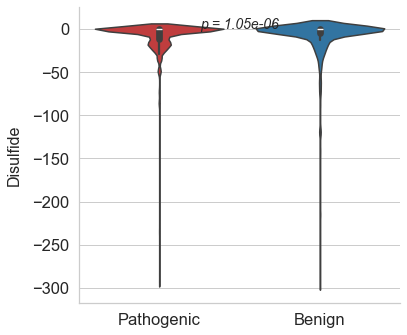

In [31]:
#The distribution of disulfide between the benign and pathogenic variants (Mann-Whitney U test). 
#The violin plot depicts the distribution of the disulfide values using density curves. 
#The boxes show the median +/- one quatile. Whiskers extend 1.5 times the inter-quartile range.


# Plotting the violin plot
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(6, 5))

# Create the violin plot
sns.violinplot(
    x="Class", 
    y="Disulfide", 
    data=train_dt, 
    inner="box", 
    linewidth=1.5, 
    palette={"Benign": "#1f77b4", "Pathogenic": "#d62728"}
)

# Add axis labels
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel("Disulfide", fontsize=16, labelpad=10)

benign = train_dt[train_dt["Class"] == "Benign"]["Disulfide"]
pathogenic = train_dt[train_dt["Class"] == "Pathogenic"]["Disulfide"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(benign, pathogenic, alternative="two-sided")

# Add p-value annotation
plt.text(0.5, max(train_dt["Disulfide"]) + 0.5, f"p = {p_value:.2e}", ha='center', fontsize=14, fontstyle='italic')
sns.despine()

# Adjust layout and save plot
plt.tight_layout()
plt.show()

2025-02-05 18:22:49,414 [28536] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-32-482e0e745b62>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(



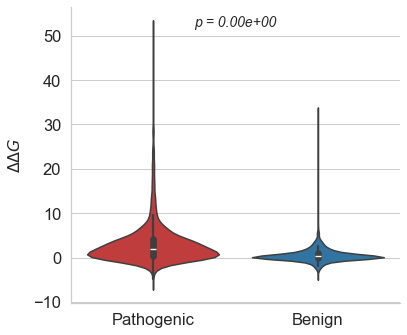

In [32]:
#The differences of total energy change between the benign and pathogenic variants (Mann-Whitney U test). 
#The violin plot depicts the distribution of the disulfide values using density curves. 
#The boxes show the median +/- one quatile. Whiskers extend 1.5 times the inter-quartile range.

# Plotting the violin plot
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(6, 5))

# Create the violin plot
sns.violinplot(
    x="Class", 
    y="dTotal_Energy", 
    data=train_dt, 
    inner="box", 
    linewidth=1.5, 
    palette={"Benign": "#1f77b4", "Pathogenic": "#d62728"}
)

# Add axis labels
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel(r"$\Delta \Delta G$", fontsize=16, labelpad=10)

benign = train_dt[train_dt["Class"] == "Benign"]["dTotal_Energy"]
pathogenic = train_dt[train_dt["Class"] == "Pathogenic"]["dTotal_Energy"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(benign, pathogenic, alternative="two-sided")

# Add p-value annotation
plt.text(0.5, max(train_dt["dTotal_Energy"]) + 0.5, f"p = {p_value:.2e}", ha='center', fontsize=14, fontstyle='italic')
sns.despine()

# Adjust layout and save plot
plt.tight_layout()
plt.show()

2025-02-05 18:23:05,984 [28536] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-33-f5cb11a8a7e6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(



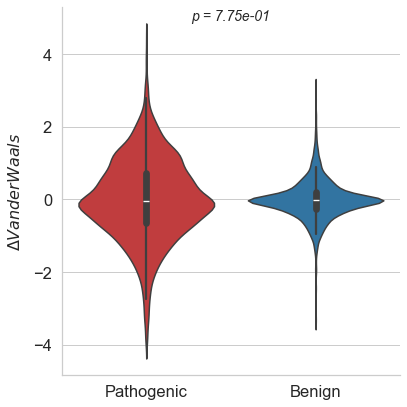

In [33]:
#The differences of Van der Waals interactions between the benign and pathogenic variants (Mann-Whitney U test). 
#The violin plot depicts the distribution of the disulfide values using density curves. 
#The boxes show the median +/- one quatile. Whiskers extend 1.5 times the inter-quartile range.

# Plotting the violin plot
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(6, 6))

# Create the violin plot
sns.violinplot(
    x="Class", 
    y="dVan_der_Waals", 
    data=train_dt, 
    inner="box", 
    linewidth=1.5, 
    palette={"Benign": "#1f77b4", "Pathogenic": "#d62728"}
)

# Add axis labels
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel(r"$\Delta Van der Waals$", fontsize=16, labelpad=10)

benign = train_dt[train_dt["Class"] == "Benign"]["dVan_der_Waals"]
pathogenic = train_dt[train_dt["Class"] == "Pathogenic"]["dVan_der_Waals"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(benign, pathogenic, alternative="two-sided")

# Add p-value annotation
plt.text(0.5, max(train_dt["dVan_der_Waals"]) + 0.5, f"p = {p_value:.2e}", ha='center', fontsize=14, fontstyle='italic')
sns.despine()

# Adjust layout and save plot
plt.tight_layout()
plt.show()

In [34]:
#Let's encode target labels with Pathogenic as 1 and 0 as Benign
#train_dt["Class"] = np.where(train_dt["Class"]=="Pathogenic", 1, 0)
#test_dt["Class"] = np.where(test_dt["Class"]=="Pathogenic", 1, 0)

In [35]:
#Scaling feature instances
scaler =  StandardScaler()
scaler.fit(train_dt.drop(columns="Class"))
scaled_train = scaler.fit_transform(train_dt.drop(columns="Class"))
scaled_test = scaler.fit_transform(test_dt.drop(columns="Class"))

In [36]:
feature_cols = train_dt.drop(columns="Class").columns
scaled_train_dt = pd.DataFrame(scaled_train, columns=feature_cols)
scaled_train_dt.head()

,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,Entropy_mainchain,...,dSolvation_Hydrophobic,dVan_der_Waals_Clashes,dEntropy_Sidechain,dEntropy_Mainchain,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dDisulfide,dIonization_Energy
0,0.260778,-1.094017,-1.350612,-1.342296,-1.219389,1.265093,-1.407160,0.457964,1.368310,0.894178,...,-2.701036,5.362947,2.460783,1.550211,0.023128,0.456890,1.671519,-0.064733,-0.096541,0.352466
1,0.249472,-1.085546,-1.334166,-1.331505,-1.259293,1.256210,-1.399155,0.289475,1.351748,0.891499,...,0.746864,1.327623,-1.832021,-3.691901,0.023128,0.214592,-5.060840,-0.209264,-0.096541,0.538528
2,0.286916,0.828836,0.772720,0.940033,0.655473,-0.885870,0.950233,-0.195480,-0.830875,-0.212864,...,-0.373125,-0.313318,1.386976,-0.166504,0.023128,-0.110041,0.749610,-0.218384,-0.096541,-0.071612
3,0.550774,-0.169721,-0.128768,-0.163254,0.416967,0.170534,-0.184325,0.368107,0.157340,0.610892,...,0.037229,-0.317866,-0.684284,-0.825600,0.023128,-0.288825,0.074353,-0.033606,-0.096541,-3.104336
4,0.393219,-1.933765,-1.484405,-1.721676,-1.044855,1.715211,-1.695262,0.324320,1.672573,1.294882,...,-0.394722,-0.448991,0.749479,-0.028553,0.023128,-0.277062,1.024566,-1.453147,-0.096541,-0.525172


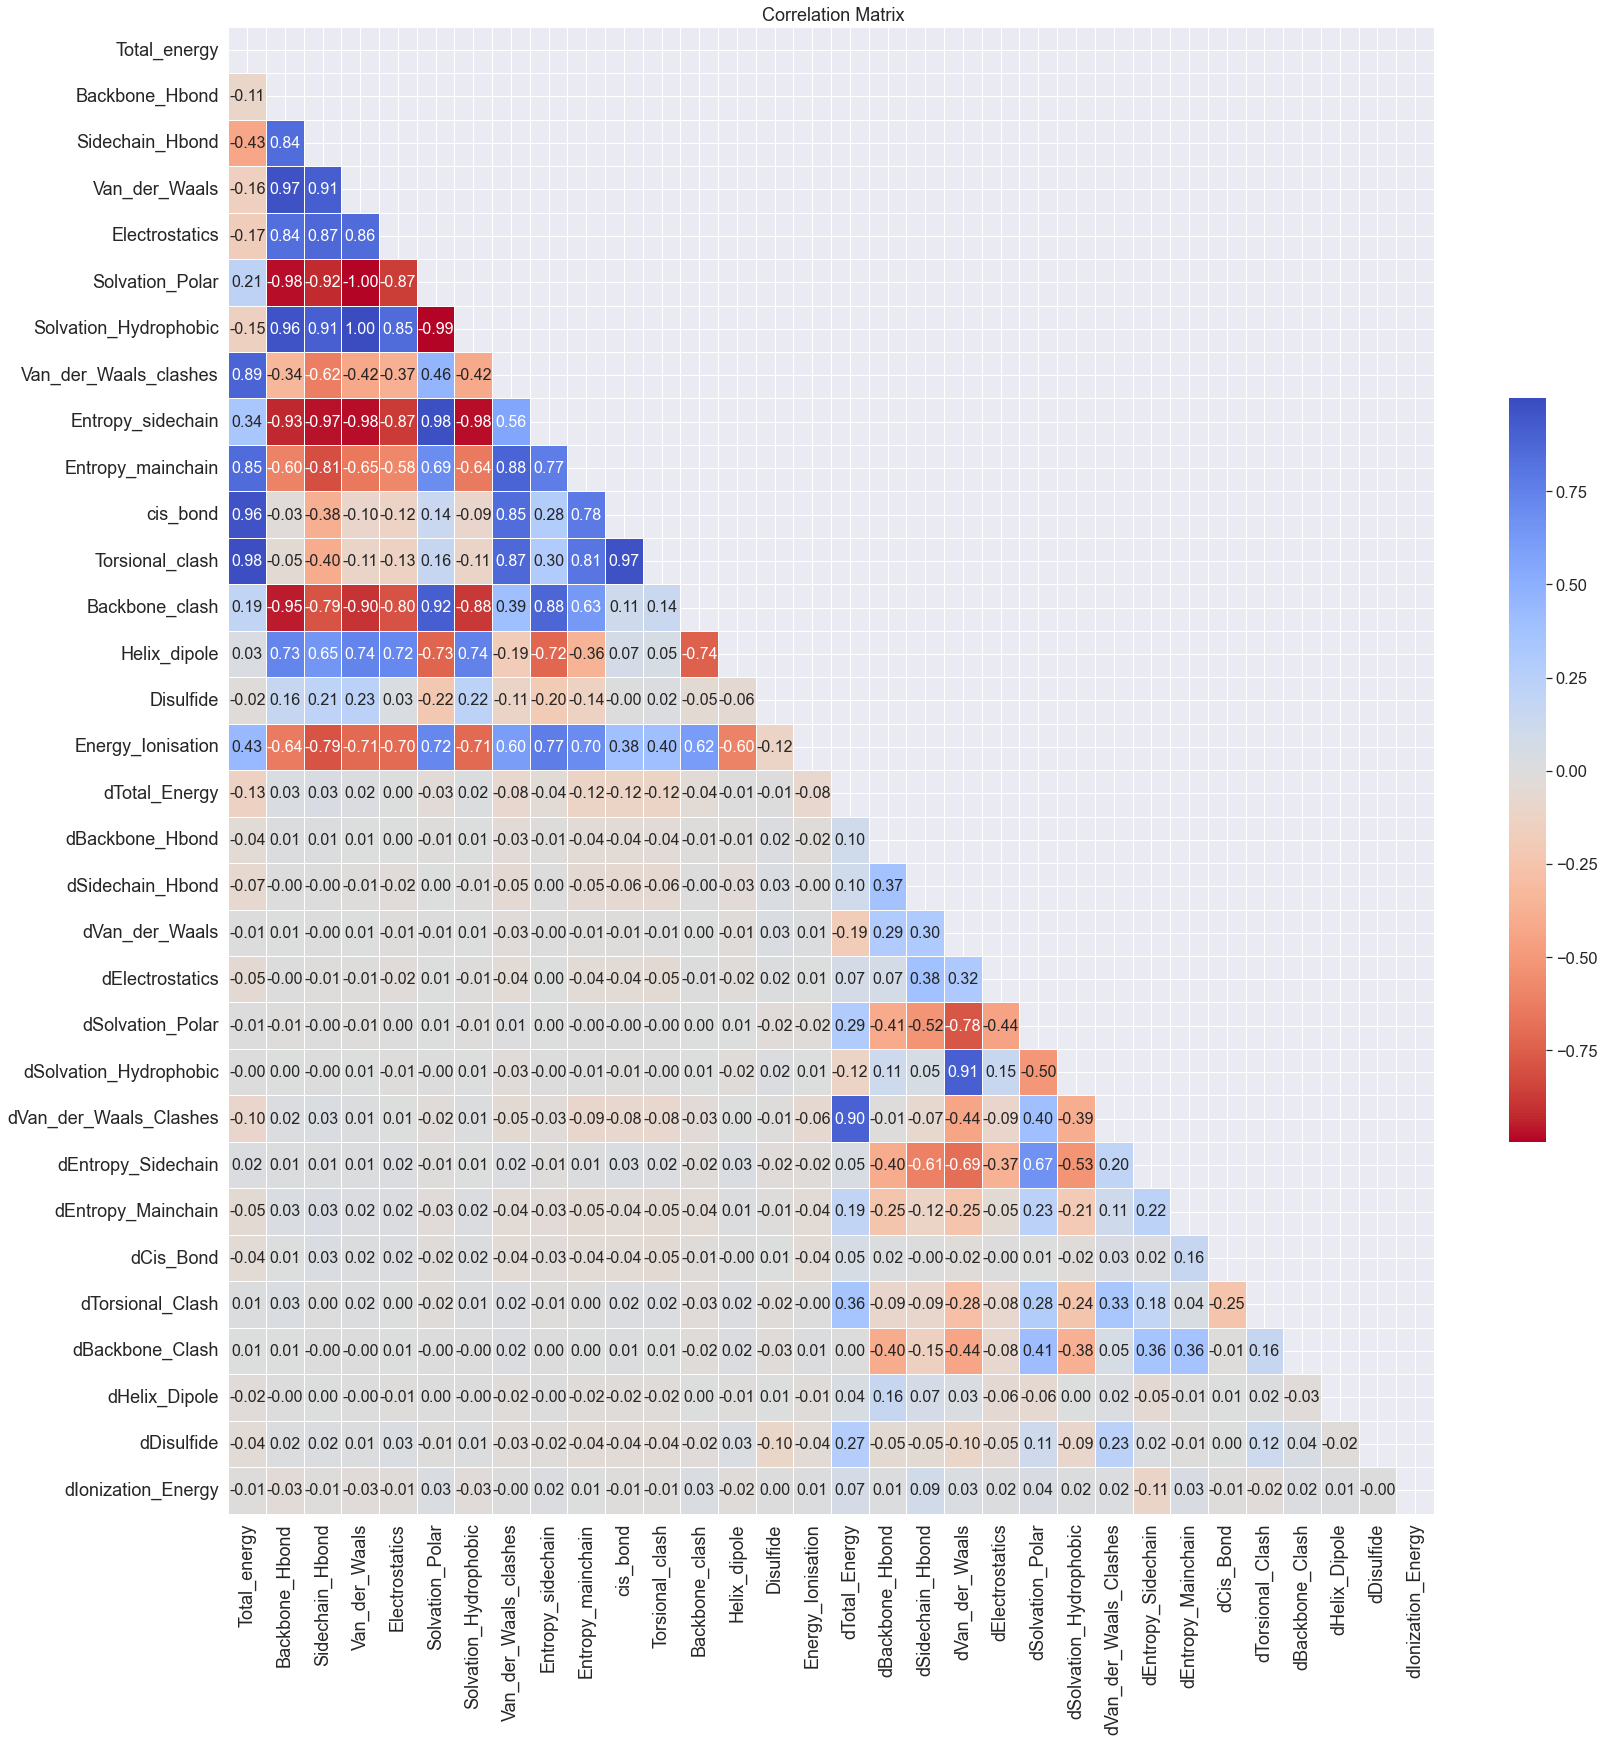

In [37]:
#Create a correlation coefficient heatmap
corr = scaled_train_dt.corr()

sns.set_style('darkgrid')
plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="coolwarm_r", annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 16}, cbar_kws={"shrink": .5})
plt.title(" Correlation Matrix", fontsize=18)
plt.tick_params(axis='both', labelsize=18)
#plt.xticks(rotation=45)
plt.tight_layout(pad=2.0)
plt.show();

In [38]:
#Let's try couple ensemble methods and settle the best. We will use a subset of both the train and test for fast computing
subset_train_dt = train_dt[:4000] #Selecting the first 4000 instances of the train set

subset_test_benign = test_dt.loc[test_dt["Class"]=="Benign"][:250] #Selecting 250 instances with benign
subset_test_pathogenic = test_dt.loc[test_dt["Class"]=="Pathogenic"][:250] #Selecting 250 instances with pathogenic

#Merge the two test categories and shuffle.
subset_test = [subset_test_benign, subset_test_pathogenic] 
subset_test_dt = pd.concat(subset_test).sample(frac=1).reset_index(drop=True)

In [39]:
#Prepare the train and test set subset and encode the target labels with 0s and 1s
X_train, y_train = subset_train_dt.drop(columns="Class"), subset_train_dt["Class"]
X_test, y_test = subset_test_dt.drop(columns="Class"), subset_test_dt["Class"]

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Let's initialize LabelEncoder
encoder = LabelEncoder() #This LabelEncoder instance stores classes_ attribute containing the mapping of original labels to encoded values
y_test = encoder.fit_transform(y_test)
y_train = encoder.fit_transform(y_train)

In [40]:
#The unique class labels LabelEncoder encountered during the fitting process, in sorted order is shown below.
#Benign is encoded as 0 and Pathogenic as 1
encoder.classes_

array(['Benign', 'Pathogenic'], dtype=object)

In [42]:
# Create a Decision Tree model
dt = DecisionTreeClassifier(criterion="entropy",
                            max_depth=4,
                            min_samples_split=0.25,
                            min_samples_leaf=2,
                            max_features="sqrt",
                            max_leaf_nodes=6,
                            random_state=42)

#Fit the dt on the train set
dt.fit(X_train, y_train) 
#Use dt to predict the test set labels
test_y_pred_proba = dt.predict_proba(X_test)[:, 1] 
train_y_pred_proba = dt.predict_proba(X_train)[:, 1] 

#Evaluate the model on AUC
test_auc_score = roc_auc_score(y_test, test_y_pred_proba) 
train_auc_score = roc_auc_score(y_train, train_y_pred_proba)

#Print out AUC score
print(f"Test AUC Score: {test_auc_score:.2f}")
print(f"Train AUC Score: {train_auc_score:.2f}")

Test AUC Score: 0.73
Train AUC Score: 0.80


Text(0.5, 1.0, 'Decision Tree Visualization')

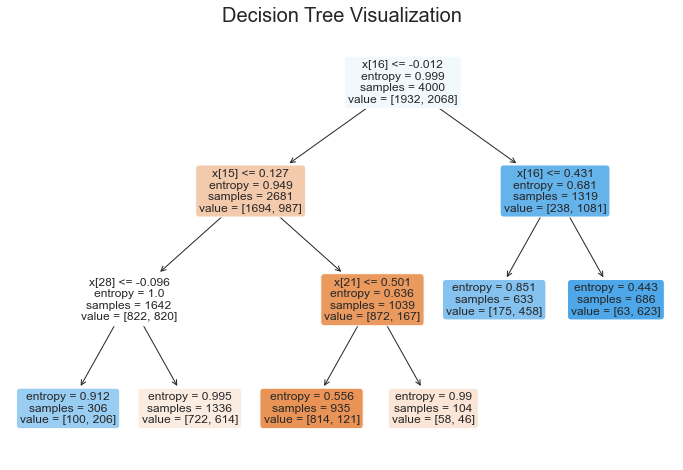

In [43]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization", fontsize=20)

#### Hyperparameter Tuning on Decision Tree Classifier using Grid Seach CV

In [45]:
#Define the parameter grid for GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [2, 4, 6],
    "max_depth": [2, 4, 6],
    "max_features": ["sqrt", 0.75, 0.80],
    "max_leaf_nodes": [3, 4, 6]}

#Initialize the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, 
                           param_grid=param_grid, 
                           cv=5, scoring="roc_auc", n_jobs=-1)

#Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

#Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)
#Make prediction
test_y_pred = best_model.predict_proba(X_test)[:, 1]
train_y_pred = best_model.predict_proba(X_train)[:, 1]

#Calculate the AUC score
test_auc_score = roc_auc_score(y_test, test_y_pred) 
train_auc_score = roc_auc_score(y_train, train_y_pred)

#Print the results
print(f"Test AUC Score: {test_auc_score:.2f}")
print(f"Train AUC Score: {train_auc_score:.2f}")
print(f"Best Parameters: {best_params}")

Test AUC Score: 0.73
Train AUC Score: 0.81
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 0.75, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [108]:
#BaggingClassifier which trains an ensemble of 200 Decision Tree classifiers
bag_clf = BaggingClassifier(
                DecisionTreeClassifier(),
                n_estimators=200,
                max_samples=0.25,
                max_features=0.70,
                bootstrap_features=True,
                bootstrap=True,
                oob_score=True,
                n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train) #Fit the dt on the trainind set
#Make prediction
test_y_pred = bag_clf.predict_proba(X_test)[:, 1]
train_y_pred = bag_clf.predict_proba(X_train)[:, 1]

#Calculate the AUC score
test_auc_score = roc_auc_score(y_test, test_y_pred) 
train_auc_score = roc_auc_score(y_train, train_y_pred)

print(f"Test AUC Score: {test_auc_score:.2f}")
print(f"Train AUC Score: {train_auc_score:.2f}")

#Print the OOB scores of the model  
print(f"OOB Score: {bag_clf.oob_score_:.3f}")

Test AUC Score: 0.83
Train AUC Score: 0.99
OOB Score: 0.844


In [186]:
#Train random forest model
rf_clf = RandomForestClassifier(n_estimators=200,
                       criterion="gini",
                       max_depth=4,
                       min_samples_leaf=2,
                       max_features="sqrt",
                       bootstrap=True,
                       oob_score=True,
                       n_jobs=-1, random_state=42)

#Fit the dt on the trainind set
rf_clf.fit(X_train, y_train) #Fit the dt on the trainind set
#Make prediction
test_y_pred = rf_clf.predict_proba(X_test)[:, 1]
train_y_pred = rf_clf.predict_proba(X_train)[:, 1]
#Calculate the AUC score
test_auc_score = roc_auc_score(y_test, test_y_pred) 
train_auc_score = roc_auc_score(y_train, train_y_pred)

print(f"Test AUC Score: {test_auc_score:.2f}")
print(f"Train AUC Score: {train_auc_score:.2f}")

#Print the OOB scores of the best model  
print(f"OOB Score: {rf_clf.oob_score_:.3f}")
print(f"OOB Score: {best_model.oob_score_:.3f}")

Test AUC Score: 0.84
Train AUC Score: 0.90
OOB Score: 0.787
OOB Score: 0.770


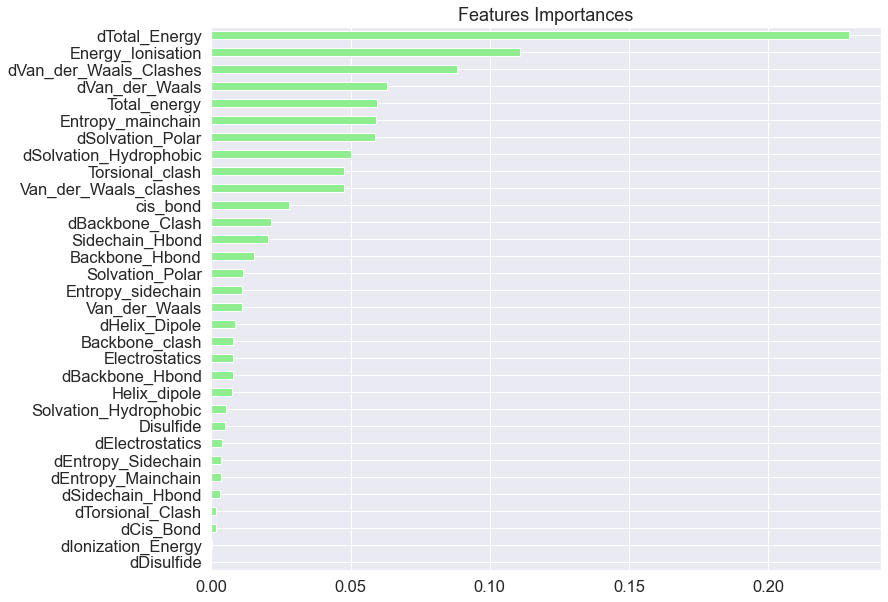

In [187]:
# Extract feature importances
importances = pd.Series(data=rf_clf.feature_importances_, index= subset_train_dt.drop(columns="Class").columns)
importances_sorted = importances.sort_values() # Sort importances

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(12, 10))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [195]:
#Define the parameter grid for GridSearchCV
param_grid = {"n_estimators": [100, 200, 250],
              "criterion": ["gini", "entropy"],
              "min_samples_leaf": [2, 4, 6],
              "max_depth": [2, 4, 6],
              "max_features": ["sqrt", 0.7, 0.8],
              "max_leaf_nodes": [3, 4, 6]}

#Initialize the RandomForestClassifier model
rf_clf_model = RandomForestClassifier(
                       bootstrap=True,
                       oob_score=True,
                       n_jobs=-1, random_state=42)

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf_model, 
                           param_grid=param_grid, 
                           cv=5, n_jobs=-1)

#Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Make predictions on the test set using the best model
test_y_pred_proba = best_model.predict_proba(X_test)[:, 1]
train_y_pred_proba = best_model.predict_proba(X_train)[:, 1]

#Calculate the AUC score
test_auc_score = roc_auc_score(y_test, test_y_pred_proba)
train_auc_score = roc_auc_score(y_train, train_y_pred_proba)
print(f"Test AUC Score: {test_auc_score:.2f}")
print(f"Train AUC Score: {train_auc_score:.2f}")

#Print parameters of the best model  
print(f"Best Parameters: {best_params}\n")
#Print the OOB scores of the best model  
print(f"OOB Score: {best_model.oob_score_:.3f}")

Test AUC Score: 0.81
Train AUC Score: 0.86
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 0.7, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'n_estimators': 100}

OOB Score: 0.769


In [194]:
#Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200,
                        learning_rate=0.1,
                        max_depth=4,
                        random_state=42)

#Fit classifier on train set
gb_clf.fit(X_train, y_train) 
#Compute accuracy for each stage of the boosting process
auc_score = [roc_auc_score(y_test, y_pred[:, 1]) for y_pred in gb_clf.staged_predict_proba(X_test)]
#Find the optimal number of estimators
bst_n_estimators = np.argmax(auc_score)+1

#Reinitialize the model with the optimal number of estimators
gb_clf_best = GradientBoostingClassifier(
                                    n_estimators=bst_n_estimators,
                                    learning_rate=0.1,
                                    max_depth=4,  
                                    random_state=42)

#Retrain gb_clf_best on the train set
gb_clf_best.fit(X_train, y_train) 
#Evaluate the accuracy of the model
test_y_pred_proba = gb_clf_best.predict_proba(X_test)[:, 1] 
train_y_pred_proba = gb_clf_best.predict_proba(X_train)[:, 1] 

#Calculate the AUC score
test_auc_score = roc_auc_score(y_test, test_y_pred_proba)
train_auc_score = roc_auc_score(y_train, train_y_pred_proba)

#Print the results
print(f"Test AUC Score: {test_auc_score:.2f}")
print(f"Train AUC Score: {train_auc_score:.2f}")

#Perform cross-validation in place of OOB to validate the model's performance
mean_cv_scores = cross_val_score(gb_clf_best, X_train, y_train, 
                                 cv=5, scoring='roc_auc').mean()
print(f"Cross-validation accuracy: {mean_cv_scores:.2f}") 

Test AUC Score: 0.88
Train AUC Score: 0.98
Cross-validation accuracy: 0.94


In [95]:
#scoring = {"precision": make_scorer(precision_score),
           #"recall":make_scorer(recall_score),
           #"auc": make_scorer(roc_auc_score)}

#Define the parameter grid for GridSearchCV
param_grid = {
    "learning_rate": [0.1, 0.15, 2],
    "min_samples_leaf": [2, 4, 6],
    "max_depth":[3, 4, 6],
    "max_features":[None, "sqrt", 0.75],
    "subsample":[0.65, 0.75, 1.0],
    "n_estimators": [50, 100, 200],
    }

# Initialize the Gradient Boosting model
gbclf_model = GradientBoostingClassifier(random_state=42)

#Initialize GridSearchCV and pass in the scoring function 
grid_search = GridSearchCV(estimator=gbclf_model, 
                           param_grid=param_grid,
                           scoring="roc_auc",
                           cv=5, n_jobs=-1)

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Make class label predictions on the test set using the best model
test_y_pred_best = best_model.predict(X_test)
train_y_pred_best = best_model.predict(X_train)

#Make probability predictions on the test set using the best model
test_y_pred_proba = best_model.predict_proba(X_test)[:, 1]
train_y_pred_proba = best_model.predict_proba(X_train)[:, 1]

#Evaluate the best model on AUC
test_auc_score = roc_auc_score(y_test, test_y_pred_proba)
train_auc_score = roc_auc_score(y_train, train_y_pred_proba)
#Evaluate the best model on RECALL
test_recall = recall_score(y_test, test_y_pred_best)
train_recall = recall_score(y_train, train_y_pred_best)
#Evaluate the best model on PRECISION
test_precision = precision_score(y_test, test_y_pred_best)
train_precision = precision_score(y_train, train_y_pred_best)

#Print the results
print(f"Best Hyperparameters: {best_params}\n")

print(f"Test Model Recall: {test_recall:.2f}\n")
print(f"Train Model Recall: {train_recall:.2f}\n")

print(f"Test Model Precision: {test_precision:.2f}\n")
print(f"Train Model Precision: {train_precision:.2f}\n")

print(f"Test Model Auc: {test_auc_score:.2f}\n")
print(f"Train Model Auc: {train_auc_score:.2f}\n")

Best Hyperparameters: {'learning_rate': 0.15, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 200, 'subsample': 0.75}

Test Model Recall: 0.74

Train Model Recall: 1.00

Test Model Precision: 0.74

Train Model Precision: 1.00

Test Model Auc: 0.81

Train Model Auc: 1.00



In [94]:
#Instantiate the XGBClassifier: xg_cl
xg_clf = xgb.XGBClassifier(objective='binary:logistic', 
                           n_estimators=500, 
                           eta=0.15,
                           max_depth=6,
                           eval_metric = "auc",
                           early_stopping_rounds=5, 
                           random_state=42)

#Fit the classifier to the training set
xg_clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
#Predict the labels of the test set: preds
y_pred = xg_clf.predict(X_test)

[0]	validation_0-auc:0.75533
[1]	validation_0-auc:0.77098
[2]	validation_0-auc:0.69090
[3]	validation_0-auc:0.73972
[4]	validation_0-auc:0.75975
[5]	validation_0-auc:0.77802
[6]	validation_0-auc:0.75585
[7]	validation_0-auc:0.76946
[8]	validation_0-auc:0.77314
[9]	validation_0-auc:0.77585
[10]	validation_0-auc:0.78174
[11]	validation_0-auc:0.78959
[12]	validation_0-auc:0.78729
[13]	validation_0-auc:0.79015
[14]	validation_0-auc:0.78989
[15]	validation_0-auc:0.79546
[16]	validation_0-auc:0.79765
[17]	validation_0-auc:0.79515
[18]	validation_0-auc:0.79826
[19]	validation_0-auc:0.80507
[20]	validation_0-auc:0.80742
[21]	validation_0-auc:0.81014
[22]	validation_0-auc:0.81586
[23]	validation_0-auc:0.81677
[24]	validation_0-auc:0.81730
[25]	validation_0-auc:0.81573
[26]	validation_0-auc:0.81690
[27]	validation_0-auc:0.81643
[28]	validation_0-auc:0.81520
[29]	validation_0-auc:0.81674


In [110]:
# Define the parameter grid for GridSearchCV
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "min_child_weight": [2, 4, 6],
    "max_depth": [3, 4, 6],
    "colsample_bytree": [0.5, 0.75, 1.0],
    "subsample": [0.65, 0.75, 1.0],
    "n_estimators": [100, 200, 500],
}

# Instantiate the XGBClassifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV and pass in the scoring function 
xgb_grid_search = GridSearchCV(estimator=xgb_model, 
                               param_grid=param_grid,
                               scoring="roc_auc",
                               cv=5, n_jobs=-1)

# Fit the model to the training data using GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = xgb_grid_search.best_params_
best_model = xgb_grid_search.best_estimator_

# Make class label predictions on the test set using the best model
test_y_pred_best = best_model.predict(X_test)
train_y_pred_best = best_model.predict(X_train)

# Make probability predictions on the test set using the best model
test_y_pred_proba = best_model.predict_proba(X_test)[:, 1]
train_y_pred_proba = best_model.predict_proba(X_train)[:, 1]

# Evaluate the best model on AUC
test_auc_score = roc_auc_score(y_test, test_y_pred_proba)
train_auc_score = roc_auc_score(y_train, train_y_pred_proba)

# Evaluate the best model on RECALL
test_recall = recall_score(y_test, test_y_pred_best)
train_recall = recall_score(y_train, train_y_pred_best)

# Evaluate the best model on PRECISION
test_precision = precision_score(y_test, test_y_pred_best)
train_precision = precision_score(y_train, train_y_pred_best)

# Print the results
print(f"Best Hyperparameters: {best_params}\n")
print(f"Test Model AUC: {test_auc_score:.2f}\n")
print(f"Train Model AUC: {train_auc_score:.2f}\n")


Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 1.0}

Test Model AUC: 0.82

Train Model AUC: 1.00



In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1, activation="sigmoid")
])

optimizer_instance = SGD(learning_rate=0.01)
model.compile(loss="binary_crossentropy", optimizer=optimizer_instance, metrics=["AUC"])
history = model.fit(X_train, y_train, epochs=12, batch_size=5,
                   validation_split=0.2)

Epoch 1/12
640/640 [==============================] - 2s 2ms/step - loss: 0.5776 - auc: 0.7642 - val_loss: 0.5258 - val_auc: 0.8172
Epoch 2/12
640/640 [==============================] - 1s 2ms/step - loss: 0.5232 - auc: 0.8221 - val_loss: 0.4965 - val_auc: 0.8503
Epoch 3/12
640/640 [==============================] - 1s 2ms/step - loss: 0.4998 - auc: 0.8425 - val_loss: 0.4792 - val_auc: 0.8619
Epoch 4/12
640/640 [==============================] - 1s 2ms/step - loss: 0.4840 - auc: 0.8515 - val_loss: 0.4655 - val_auc: 0.8681
Epoch 5/12
640/640 [==============================] - 1s 2ms/step - loss: 0.4735 - auc: 0.8586 - val_loss: 0.4569 - val_auc: 0.8713
Epoch 6/12
640/640 [==============================] - 1s 2ms/step - loss: 0.4651 - auc: 0.8633 - val_loss: 0.4502 - val_auc: 0.8760
Epoch 7/12
640/640 [==============================] - 1s 2ms/step - loss: 0.4575 - auc: 0.8681 - val_loss: 0.4446 - val_auc: 0.8797
Epoch 8/12
640/640 [==============================] - 1s 2ms/step - loss: 0.

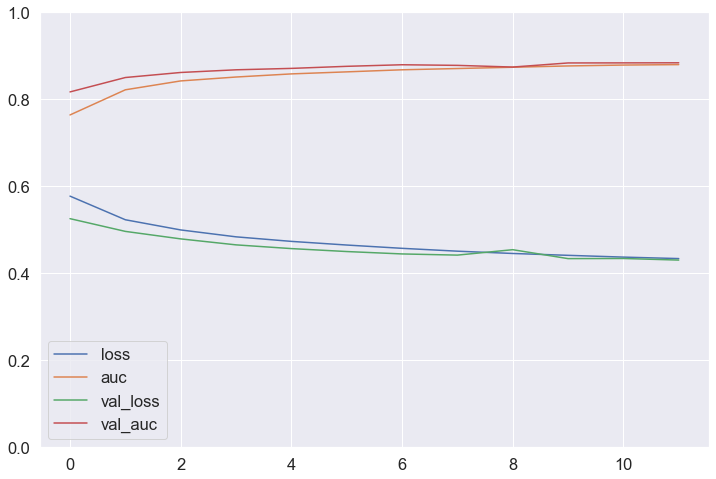

In [91]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [92]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.5255 - auc: 0.8169


[0.5254659056663513, 0.8169200420379639]

In [116]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# Define a function to build the model
def build_model(optimizer='adam', learning_rate=0.001, activation='relu'):
    model = Sequential()
    model.add(Dense(32, activation=activation, input_shape=(X_train.shape[1],)))
    #model.add(Dense(16, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",
                  optimizer=optimizer,
                  metrics=["AUC"])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(model=build_model, verbose=0)

# Define the hyperparameters for random search
params = dict(model__optimizer=["sgd", "adam"], 
              model__learning_rate=[0.001, 0.01, 0.15],
              batch_size=[8, 16, 32],
              epochs=[12, 30, 50],
              model__activation=["relu", "tanh"])

# Set up early stopping and model checkpointing
monitor_val_auc = EarlyStopping(monitor="val_auc", patience=10, mode="max")
model_checkpoint = ModelCheckpoint("./best_banknote_model.keras", save_best_only=True, monitor="val_auc", mode="max")

# Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=10, cv=3)
h_callback = random_search.fit(X_train, y_train, 
             callbacks=[monitor_val_auc, model_checkpoint],
             validation_split=0.2, verbose=2)

Epoch 1/50
267/267 - 1s - loss: 0.6189 - auc: 0.7176 - val_loss: 0.5921 - val_auc: 0.7550 - 1s/epoch - 4ms/step
Epoch 2/50
267/267 - 0s - loss: 0.5677 - auc: 0.7763 - val_loss: 0.5678 - val_auc: 0.7728 - 467ms/epoch - 2ms/step
Epoch 3/50
267/267 - 0s - loss: 0.5462 - auc: 0.7948 - val_loss: 0.5495 - val_auc: 0.8002 - 467ms/epoch - 2ms/step
Epoch 4/50
267/267 - 0s - loss: 0.5321 - auc: 0.8105 - val_loss: 0.5356 - val_auc: 0.8089 - 425ms/epoch - 2ms/step
Epoch 5/50
267/267 - 0s - loss: 0.5215 - auc: 0.8182 - val_loss: 0.5265 - val_auc: 0.8256 - 443ms/epoch - 2ms/step
Epoch 6/50
267/267 - 0s - loss: 0.5142 - auc: 0.8254 - val_loss: 0.5175 - val_auc: 0.8262 - 445ms/epoch - 2ms/step
Epoch 7/50
267/267 - 0s - loss: 0.5073 - auc: 0.8304 - val_loss: 0.5097 - val_auc: 0.8307 - 423ms/epoch - 2ms/step
Epoch 8/50
267/267 - 0s - loss: 0.5013 - auc: 0.8355 - val_loss: 0.5082 - val_auc: 0.8227 - 437ms/epoch - 2ms/step
Epoch 9/50
267/267 - 0s - loss: 0.4978 - auc: 0.8362 - val_loss: 0.4978 - val_auc: 

Epoch 22/50
267/267 - 0s - loss: 0.4675 - auc: 0.8583 - val_loss: 0.4774 - val_auc: 0.8516 - 406ms/epoch - 2ms/step
Epoch 23/50
267/267 - 0s - loss: 0.4639 - auc: 0.8606 - val_loss: 0.4734 - val_auc: 0.8549 - 414ms/epoch - 2ms/step
Epoch 24/50
267/267 - 0s - loss: 0.4625 - auc: 0.8614 - val_loss: 0.4754 - val_auc: 0.8514 - 405ms/epoch - 2ms/step
Epoch 25/50
267/267 - 0s - loss: 0.4601 - auc: 0.8635 - val_loss: 0.4735 - val_auc: 0.8544 - 393ms/epoch - 1ms/step
Epoch 26/50
267/267 - 0s - loss: 0.4579 - auc: 0.8652 - val_loss: 0.4787 - val_auc: 0.8464 - 396ms/epoch - 1ms/step
Epoch 27/50
267/267 - 0s - loss: 0.4547 - auc: 0.8677 - val_loss: 0.4719 - val_auc: 0.8554 - 398ms/epoch - 1ms/step
Epoch 28/50
267/267 - 0s - loss: 0.4539 - auc: 0.8678 - val_loss: 0.4730 - val_auc: 0.8528 - 390ms/epoch - 1ms/step
Epoch 29/50
267/267 - 0s - loss: 0.4522 - auc: 0.8687 - val_loss: 0.4741 - val_auc: 0.8540 - 457ms/epoch - 2ms/step
Epoch 30/50
267/267 - 0s - loss: 0.4495 - auc: 0.8712 - val_loss: 0.4722

Epoch 43/50
267/267 - 0s - loss: 0.4205 - auc: 0.8900 - val_loss: 0.5007 - val_auc: 0.8338 - 397ms/epoch - 1ms/step
Epoch 44/50
267/267 - 0s - loss: 0.4200 - auc: 0.8898 - val_loss: 0.5000 - val_auc: 0.8331 - 401ms/epoch - 2ms/step
Epoch 45/50
267/267 - 0s - loss: 0.4175 - auc: 0.8917 - val_loss: 0.5010 - val_auc: 0.8345 - 395ms/epoch - 1ms/step
Epoch 46/50
267/267 - 0s - loss: 0.4163 - auc: 0.8913 - val_loss: 0.4985 - val_auc: 0.8345 - 412ms/epoch - 2ms/step
Epoch 47/50
267/267 - 0s - loss: 0.4145 - auc: 0.8930 - val_loss: 0.5011 - val_auc: 0.8339 - 398ms/epoch - 1ms/step
Epoch 48/50
267/267 - 0s - loss: 0.4120 - auc: 0.8949 - val_loss: 0.5000 - val_auc: 0.8336 - 396ms/epoch - 1ms/step
Epoch 49/50
267/267 - 0s - loss: 0.4098 - auc: 0.8956 - val_loss: 0.4973 - val_auc: 0.8367 - 393ms/epoch - 1ms/step
Epoch 50/50
267/267 - 0s - loss: 0.4095 - auc: 0.8954 - val_loss: 0.4966 - val_auc: 0.8375 - 408ms/epoch - 2ms/step
Epoch 1/30
267/267 - 1s - loss: 0.6499 - auc: 0.6599 - val_loss: 0.6064 

Epoch 4/30
267/267 - 0s - loss: 0.5414 - auc: 0.8021 - val_loss: 0.5460 - val_auc: 0.7924 - 425ms/epoch - 2ms/step
Epoch 5/30
267/267 - 0s - loss: 0.5300 - auc: 0.8113 - val_loss: 0.5428 - val_auc: 0.7973 - 473ms/epoch - 2ms/step
Epoch 6/30
267/267 - 0s - loss: 0.5222 - auc: 0.8179 - val_loss: 0.5377 - val_auc: 0.8015 - 465ms/epoch - 2ms/step
Epoch 7/30
267/267 - 0s - loss: 0.5160 - auc: 0.8226 - val_loss: 0.5330 - val_auc: 0.8043 - 421ms/epoch - 2ms/step
Epoch 8/30
267/267 - 0s - loss: 0.5107 - auc: 0.8270 - val_loss: 0.5305 - val_auc: 0.8066 - 389ms/epoch - 1ms/step
Epoch 9/30
267/267 - 0s - loss: 0.5074 - auc: 0.8296 - val_loss: 0.5286 - val_auc: 0.8077 - 408ms/epoch - 2ms/step
Epoch 10/30
267/267 - 0s - loss: 0.5034 - auc: 0.8332 - val_loss: 0.5338 - val_auc: 0.8023 - 441ms/epoch - 2ms/step
Epoch 11/30
267/267 - 0s - loss: 0.4994 - auc: 0.8354 - val_loss: 0.5273 - val_auc: 0.8094 - 395ms/epoch - 1ms/step
Epoch 12/30
267/267 - 0s - loss: 0.4973 - auc: 0.8373 - val_loss: 0.5281 - val

134/134 - 0s - loss: 0.4741 - auc: 0.8536 - val_loss: 0.4742 - val_auc: 0.8573 - 237ms/epoch - 2ms/step
Epoch 10/12
134/134 - 0s - loss: 0.4727 - auc: 0.8549 - val_loss: 0.4758 - val_auc: 0.8503 - 241ms/epoch - 2ms/step
Epoch 11/12
134/134 - 0s - loss: 0.4669 - auc: 0.8596 - val_loss: 0.4694 - val_auc: 0.8607 - 236ms/epoch - 2ms/step
Epoch 12/12
134/134 - 0s - loss: 0.4637 - auc: 0.8611 - val_loss: 0.4653 - val_auc: 0.8625 - 233ms/epoch - 2ms/step
Epoch 1/12
134/134 - 1s - loss: 0.5931 - auc: 0.7441 - val_loss: 0.5476 - val_auc: 0.8067 - 981ms/epoch - 7ms/step
Epoch 2/12
134/134 - 0s - loss: 0.5422 - auc: 0.8039 - val_loss: 0.5192 - val_auc: 0.8317 - 235ms/epoch - 2ms/step
Epoch 3/12
134/134 - 0s - loss: 0.5205 - auc: 0.8217 - val_loss: 0.5020 - val_auc: 0.8384 - 220ms/epoch - 2ms/step
Epoch 4/12
134/134 - 0s - loss: 0.5101 - auc: 0.8270 - val_loss: 0.4944 - val_auc: 0.8407 - 232ms/epoch - 2ms/step
Epoch 5/12
134/134 - 0s - loss: 0.5001 - auc: 0.8357 - val_loss: 0.4896 - val_auc: 0.843

Epoch 9/50
67/67 - 0s - loss: 0.4906 - auc: 0.8423 - val_loss: 0.4952 - val_auc: 0.8375 - 131ms/epoch - 2ms/step
Epoch 10/50
67/67 - 0s - loss: 0.4868 - auc: 0.8450 - val_loss: 0.4926 - val_auc: 0.8459 - 140ms/epoch - 2ms/step
Epoch 11/50
67/67 - 0s - loss: 0.4832 - auc: 0.8474 - val_loss: 0.4891 - val_auc: 0.8467 - 134ms/epoch - 2ms/step
Epoch 12/50
67/67 - 0s - loss: 0.4797 - auc: 0.8500 - val_loss: 0.4869 - val_auc: 0.8487 - 134ms/epoch - 2ms/step
Epoch 13/50
67/67 - 0s - loss: 0.4776 - auc: 0.8519 - val_loss: 0.4877 - val_auc: 0.8514 - 130ms/epoch - 2ms/step
Epoch 14/50
67/67 - 0s - loss: 0.4746 - auc: 0.8533 - val_loss: 0.4833 - val_auc: 0.8495 - 134ms/epoch - 2ms/step
Epoch 15/50
67/67 - 0s - loss: 0.4708 - auc: 0.8559 - val_loss: 0.4811 - val_auc: 0.8517 - 135ms/epoch - 2ms/step
Epoch 16/50
67/67 - 0s - loss: 0.4683 - auc: 0.8577 - val_loss: 0.4810 - val_auc: 0.8476 - 138ms/epoch - 2ms/step
Epoch 17/50
67/67 - 0s - loss: 0.4661 - auc: 0.8589 - val_loss: 0.4766 - val_auc: 0.8535 

Epoch 31/50
67/67 - 0s - loss: 0.4291 - auc: 0.8828 - val_loss: 0.4649 - val_auc: 0.8604 - 132ms/epoch - 2ms/step
Epoch 32/50
67/67 - 0s - loss: 0.4259 - auc: 0.8855 - val_loss: 0.4646 - val_auc: 0.8582 - 127ms/epoch - 2ms/step
Epoch 33/50
67/67 - 0s - loss: 0.4228 - auc: 0.8876 - val_loss: 0.4661 - val_auc: 0.8560 - 137ms/epoch - 2ms/step
Epoch 34/50
67/67 - 0s - loss: 0.4204 - auc: 0.8889 - val_loss: 0.4627 - val_auc: 0.8593 - 137ms/epoch - 2ms/step
Epoch 35/50
67/67 - 0s - loss: 0.4171 - auc: 0.8909 - val_loss: 0.4652 - val_auc: 0.8564 - 130ms/epoch - 2ms/step
Epoch 36/50
67/67 - 0s - loss: 0.4155 - auc: 0.8915 - val_loss: 0.4615 - val_auc: 0.8610 - 132ms/epoch - 2ms/step
Epoch 37/50
67/67 - 0s - loss: 0.4127 - auc: 0.8934 - val_loss: 0.4624 - val_auc: 0.8605 - 136ms/epoch - 2ms/step
Epoch 38/50
67/67 - 0s - loss: 0.4134 - auc: 0.8933 - val_loss: 0.4607 - val_auc: 0.8603 - 138ms/epoch - 2ms/step
Epoch 39/50
67/67 - 0s - loss: 0.4102 - auc: 0.8951 - val_loss: 0.4672 - val_auc: 0.8539

Epoch 3/30
267/267 - 0s - loss: 0.5065 - auc: 0.8290 - val_loss: 0.5020 - val_auc: 0.8279 - 423ms/epoch - 2ms/step
Epoch 4/30
267/267 - 0s - loss: 0.5000 - auc: 0.8334 - val_loss: 0.4943 - val_auc: 0.8364 - 421ms/epoch - 2ms/step
Epoch 5/30
267/267 - 0s - loss: 0.4926 - auc: 0.8385 - val_loss: 0.4935 - val_auc: 0.8354 - 407ms/epoch - 2ms/step
Epoch 6/30
267/267 - 0s - loss: 0.4860 - auc: 0.8439 - val_loss: 0.4890 - val_auc: 0.8372 - 406ms/epoch - 2ms/step
Epoch 7/30
267/267 - 0s - loss: 0.4822 - auc: 0.8470 - val_loss: 0.4831 - val_auc: 0.8486 - 416ms/epoch - 2ms/step
Epoch 8/30
267/267 - 0s - loss: 0.4764 - auc: 0.8499 - val_loss: 0.4803 - val_auc: 0.8519 - 409ms/epoch - 2ms/step
Epoch 9/30
267/267 - 0s - loss: 0.4726 - auc: 0.8539 - val_loss: 0.4777 - val_auc: 0.8487 - 413ms/epoch - 2ms/step
Epoch 10/30
267/267 - 0s - loss: 0.4699 - auc: 0.8549 - val_loss: 0.4762 - val_auc: 0.8554 - 413ms/epoch - 2ms/step
Epoch 11/30
267/267 - 0s - loss: 0.4656 - auc: 0.8573 - val_loss: 0.4766 - val_

Epoch 14/30
267/267 - 0s - loss: 0.4436 - auc: 0.8741 - val_loss: 0.5052 - val_auc: 0.8296 - 443ms/epoch - 2ms/step
Epoch 15/30
267/267 - 0s - loss: 0.4379 - auc: 0.8789 - val_loss: 0.5051 - val_auc: 0.8304 - 462ms/epoch - 2ms/step
Epoch 16/30
267/267 - 0s - loss: 0.4338 - auc: 0.8806 - val_loss: 0.5024 - val_auc: 0.8324 - 447ms/epoch - 2ms/step
Epoch 17/30
267/267 - 0s - loss: 0.4300 - auc: 0.8826 - val_loss: 0.5059 - val_auc: 0.8286 - 400ms/epoch - 1ms/step
Epoch 18/30
267/267 - 0s - loss: 0.4252 - auc: 0.8856 - val_loss: 0.5053 - val_auc: 0.8326 - 406ms/epoch - 2ms/step
Epoch 19/30
267/267 - 0s - loss: 0.4211 - auc: 0.8887 - val_loss: 0.5051 - val_auc: 0.8297 - 433ms/epoch - 2ms/step
Epoch 20/30
267/267 - 0s - loss: 0.4154 - auc: 0.8920 - val_loss: 0.5022 - val_auc: 0.8347 - 414ms/epoch - 2ms/step
Epoch 21/30
267/267 - 0s - loss: 0.4116 - auc: 0.8939 - val_loss: 0.5003 - val_auc: 0.8384 - 456ms/epoch - 2ms/step
Epoch 22/30
267/267 - 0s - loss: 0.4116 - auc: 0.8937 - val_loss: 0.4998

134/134 - 0s - loss: 0.4874 - auc: 0.8453 - val_loss: 0.4965 - val_auc: 0.8344 - 215ms/epoch - 2ms/step
Epoch 20/50
134/134 - 0s - loss: 0.4861 - auc: 0.8462 - val_loss: 0.4940 - val_auc: 0.8371 - 215ms/epoch - 2ms/step
Epoch 21/50
134/134 - 0s - loss: 0.4838 - auc: 0.8474 - val_loss: 0.4963 - val_auc: 0.8423 - 227ms/epoch - 2ms/step
Epoch 22/50
134/134 - 0s - loss: 0.4832 - auc: 0.8494 - val_loss: 0.4901 - val_auc: 0.8395 - 219ms/epoch - 2ms/step
Epoch 23/50
134/134 - 0s - loss: 0.4814 - auc: 0.8491 - val_loss: 0.4894 - val_auc: 0.8416 - 220ms/epoch - 2ms/step
Epoch 24/50
134/134 - 0s - loss: 0.4801 - auc: 0.8502 - val_loss: 0.4879 - val_auc: 0.8426 - 221ms/epoch - 2ms/step
Epoch 25/50
134/134 - 0s - loss: 0.4787 - auc: 0.8513 - val_loss: 0.4876 - val_auc: 0.8446 - 225ms/epoch - 2ms/step
Epoch 26/50
134/134 - 0s - loss: 0.4773 - auc: 0.8523 - val_loss: 0.4858 - val_auc: 0.8463 - 218ms/epoch - 2ms/step
Epoch 27/50
134/134 - 0s - loss: 0.4763 - auc: 0.8528 - val_loss: 0.4852 - val_auc: 

Epoch 40/50
134/134 - 0s - loss: 0.4760 - auc: 0.8526 - val_loss: 0.4862 - val_auc: 0.8406 - 226ms/epoch - 2ms/step
Epoch 41/50
134/134 - 0s - loss: 0.4752 - auc: 0.8529 - val_loss: 0.4793 - val_auc: 0.8497 - 215ms/epoch - 2ms/step
Epoch 42/50
134/134 - 0s - loss: 0.4741 - auc: 0.8541 - val_loss: 0.4789 - val_auc: 0.8497 - 219ms/epoch - 2ms/step
Epoch 43/50
134/134 - 0s - loss: 0.4726 - auc: 0.8546 - val_loss: 0.4791 - val_auc: 0.8489 - 221ms/epoch - 2ms/step
Epoch 44/50
134/134 - 0s - loss: 0.4714 - auc: 0.8555 - val_loss: 0.4792 - val_auc: 0.8485 - 225ms/epoch - 2ms/step
Epoch 45/50
134/134 - 0s - loss: 0.4703 - auc: 0.8561 - val_loss: 0.4785 - val_auc: 0.8496 - 224ms/epoch - 2ms/step
Epoch 46/50
134/134 - 0s - loss: 0.4690 - auc: 0.8574 - val_loss: 0.4759 - val_auc: 0.8522 - 216ms/epoch - 2ms/step
Epoch 47/50
134/134 - 0s - loss: 0.4677 - auc: 0.8580 - val_loss: 0.4763 - val_auc: 0.8515 - 234ms/epoch - 2ms/step
Epoch 48/50
134/134 - 0s - loss: 0.4668 - auc: 0.8585 - val_loss: 0.4772

Epoch 11/50
134/134 - 0s - loss: 0.4985 - auc: 0.8463 - val_loss: 0.4975 - val_auc: 0.8422 - 227ms/epoch - 2ms/step
Epoch 12/50
134/134 - 0s - loss: 0.4935 - auc: 0.8492 - val_loss: 0.4921 - val_auc: 0.8463 - 223ms/epoch - 2ms/step
Epoch 13/50
134/134 - 0s - loss: 0.4891 - auc: 0.8519 - val_loss: 0.4884 - val_auc: 0.8476 - 222ms/epoch - 2ms/step
Epoch 14/50
134/134 - 0s - loss: 0.4849 - auc: 0.8544 - val_loss: 0.4837 - val_auc: 0.8490 - 228ms/epoch - 2ms/step
Epoch 15/50
134/134 - 0s - loss: 0.4811 - auc: 0.8573 - val_loss: 0.4821 - val_auc: 0.8512 - 241ms/epoch - 2ms/step
Epoch 16/50
134/134 - 0s - loss: 0.4781 - auc: 0.8587 - val_loss: 0.4788 - val_auc: 0.8536 - 221ms/epoch - 2ms/step
Epoch 17/50
134/134 - 0s - loss: 0.4747 - auc: 0.8611 - val_loss: 0.4750 - val_auc: 0.8552 - 224ms/epoch - 2ms/step
Epoch 18/50
134/134 - 0s - loss: 0.4720 - auc: 0.8624 - val_loss: 0.4729 - val_auc: 0.8562 - 235ms/epoch - 2ms/step
Epoch 19/50
134/134 - 0s - loss: 0.4691 - auc: 0.8644 - val_loss: 0.4715

Epoch 32/50
134/134 - 0s - loss: 0.4416 - auc: 0.8805 - val_loss: 0.4674 - val_auc: 0.8587 - 209ms/epoch - 2ms/step
Epoch 33/50
134/134 - 0s - loss: 0.4397 - auc: 0.8820 - val_loss: 0.4668 - val_auc: 0.8578 - 225ms/epoch - 2ms/step
Epoch 34/50
134/134 - 0s - loss: 0.4379 - auc: 0.8825 - val_loss: 0.4679 - val_auc: 0.8603 - 230ms/epoch - 2ms/step
Epoch 35/50
134/134 - 0s - loss: 0.4368 - auc: 0.8827 - val_loss: 0.4658 - val_auc: 0.8595 - 234ms/epoch - 2ms/step
Epoch 36/50
134/134 - 0s - loss: 0.4354 - auc: 0.8836 - val_loss: 0.4663 - val_auc: 0.8593 - 217ms/epoch - 2ms/step
Epoch 37/50
134/134 - 0s - loss: 0.4338 - auc: 0.8842 - val_loss: 0.4659 - val_auc: 0.8585 - 211ms/epoch - 2ms/step
Epoch 38/50
134/134 - 0s - loss: 0.4322 - auc: 0.8851 - val_loss: 0.4649 - val_auc: 0.8603 - 217ms/epoch - 2ms/step
Epoch 39/50
134/134 - 0s - loss: 0.4308 - auc: 0.8855 - val_loss: 0.4659 - val_auc: 0.8598 - 217ms/epoch - 2ms/step
Epoch 40/50
134/134 - 0s - loss: 0.4294 - auc: 0.8865 - val_loss: 0.4658

Epoch 3/50
200/200 - 0s - loss: 0.5476 - auc: 0.8058 - val_loss: 0.5227 - val_auc: 0.8348 - 310ms/epoch - 2ms/step
Epoch 4/50
200/200 - 0s - loss: 0.5321 - auc: 0.8193 - val_loss: 0.5100 - val_auc: 0.8464 - 309ms/epoch - 2ms/step
Epoch 5/50
200/200 - 0s - loss: 0.5204 - auc: 0.8289 - val_loss: 0.4995 - val_auc: 0.8528 - 308ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 0.5108 - auc: 0.8379 - val_loss: 0.4914 - val_auc: 0.8576 - 294ms/epoch - 1ms/step
Epoch 7/50
200/200 - 0s - loss: 0.5029 - auc: 0.8434 - val_loss: 0.4844 - val_auc: 0.8609 - 302ms/epoch - 2ms/step
Epoch 8/50
200/200 - 0s - loss: 0.4961 - auc: 0.8483 - val_loss: 0.4782 - val_auc: 0.8635 - 433ms/epoch - 2ms/step
Epoch 9/50
200/200 - 0s - loss: 0.4902 - auc: 0.8521 - val_loss: 0.4732 - val_auc: 0.8650 - 321ms/epoch - 2ms/step
Epoch 10/50
200/200 - 0s - loss: 0.4852 - auc: 0.8543 - val_loss: 0.4696 - val_auc: 0.8679 - 341ms/epoch - 2ms/step
Epoch 11/50
200/200 - 0s - loss: 0.4809 - auc: 0.8574 - val_loss: 0.4655 - val_

In [117]:
#Retrieve the Best Combination of Hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}\n")

#Retrieve the Best Model. This will give the model already trained on the best combination of hyperparameters
best_model = random_search.best_estimator_
# Make probability predictions on the test set using the best model
test_y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model on AUC
test_auc_score = roc_auc_score(y_test, test_y_pred_proba)
print(f"Test Model AUC: {test_auc_score:.2f}\n")

Best Hyperparameters: {'model__optimizer': 'sgd', 'model__learning_rate': 0.15, 'model__activation': 'relu', 'epochs': 50, 'batch_size': 16}

Test Model AUC: 0.82

